# <center> Fantasy Premier League Data Clean-up and EDA </center>

Author:  Farhan Kassam

In this notebook, we will be reviewing FPL data from gameweeks (GW) 1-33 of the 22/23 season with the goal of cleaning the data and coming to some preliminary insights on what effects players performance in the game.

The data was obtained from: <br>
Anand, Vaastav. (2023). <i>FPL Historical Dataset</i>. https://github.com/vaastav/Fantasy-Premier-League/.

The steps that will be performed are:

- Filling any null values
- Determining relationships between features
- Feature Selection/Engineering

Let's start by reading the data, viewing the shape, features and a sample.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('../data/merged_gw.csv')
print(df.shape)
print(df.columns)

(22896, 41)
Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')


In [3]:
# sample of data and option to show all columns
pd.set_option('display.max_columns', None)
df.sample(5, random_state=17)

name position       team   xP  assists  bonus  bps  \
1076           Yerry Mina      DEF    Everton  0.0        0      0    0   
8855  Allan Saint-Maximin      MID  Newcastle  1.2        0      0    0   
6887          Matt Turner       GK    Arsenal  0.5        0      0    0   
2635         Raúl Jiménez      FWD     Wolves  1.5        0      0   -4   
460              Dan Burn      DEF  Newcastle  2.4        0      0   23   

      clean_sheets  creativity  element  expected_assists  \
1076             0         0.0      188               0.0   
8855             0         0.0      368               0.0   
6887             0         0.0       24               0.0   
2635             1        23.8      476               0.0   
460              1        10.2      358               0.0   

      expected_goal_involvements  expected_goals  expected_goals_conceded  \
1076                         0.0             0.0                      0.0   
8855                         0.0             0.0                      0.0   
6887                         0.0             0.0                      0.0   
2635                         0.0             0.0                      0.0   
460                          0.0             0.0                      0.0   

      fixture  goals_conceded  goals_scored  ict_index  influence  \
1076       12               0             0        0.0        0.0   
8855      156               0             0        0.0        0.0   
6887      127               0             0        0.0        0.0   
2635       42               0             0        8.8        2.8   
460         7               0             0        5.6       10.2   

              kickoff_time  minutes  opponent_team  own_goals  \
1076  2022-08-13T11:30:00Z        0              2          0   
8855  2022-11-12T17:30:00Z        0              6          0   
6887  2022-10-23T13:00:00Z        0             17          0   
2635  2022-08-31T18:30:00Z       90              3          0   
460   2022-08-06T14:00:00Z       90             16          0   

      penalties_missed  penalties_saved  red_cards  round  saves  selected  \
1076                 0                0          0      2      0     14374   
8855                 0                0          0     16      0    383669   
6887                 0                0          0     13      0    167134   
2635                 0                0          0      5      0     67062   
460                  0                0          0      1      0     89476   

      starts  team_a_score  team_h_score  threat  total_points  \
1076       0             1             2     0.0             0   
8855       0             0             1     0.0             0   
6887       0             1             1     0.0             0   
2635       0             0             0    61.0             2   
460        0             0             2    36.0             6   

      transfers_balance  transfers_in  transfers_out  value  was_home  \
1076              -5522           760           6282     45     False   
8855               2244         14641          12397     62      True   
6887               -920          5121           6041     39     False   
2635              29503         37485           7982     69     False   
460                   0             0              0     45      True   

      yellow_cards    GW  
1076             0   2.0  
8855             0  16.0  
6887             0  13.0  
2635             0   5.0  
460              0   1.0

From the above we see we have a wide dataset which provides us information on player and team performance as well as classifiers, below is a comprehensive description of each column.

# Data Descriptions

| Column Name                | Description                                                                                                                                                                         |
|----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| name                       | A player's name                                                                                                                                                                     |
| position                   | A player's position                                                                                                                                                                 |
| team                       | The team a player belongs to                                                                                                                                                        |
|                         xP | Expected points calculated by FPL (what we will try to beat in modelling)                                                                                                           |
| assists                    | The number of passes in a game a player made that directly contributed to a goal                                                                                                    |
| bonus                      | The number of bonus points a player earned in a game                                                                                                                                |
| bps                        | The number of points earned through the bonus points system in FPL                                                                                                                  |
| clean_sheets               | Has a player successfully prevented the opposing team from scoring                                                                                                                  |
| creativity                 | Creativity assesses player performance in terms of producing goalscoring opportunities for others. It can be used as a guide to identify the players most likely to supply assists. |
| element                    | Indicates a player's position in ordinal format                                                                                                                                     |
| expected_assists           | A statistic that measures the number of assists that a player was expected to have returned in a match.                                                                             |
| expected_goal_involvements | A statistic that measures both the number of goals and assists that a team or player were expected to return in a Gameweek                                                          |
| expected_goals             | A statistic that measures both the quantity and quality of shots, based on how often each is normally a goal                                                                        |
| expected_goals_conceded    | This is the expected number of goals that a defence is expected to concede                                                                                                          |
| fixture                    | The game number in Premier League                                                                                                                                                   |
| goals_conceded             | The number of goals conceded by a player's team                                                                                                                                     |
| goals_scored               | The number of goals scored by a player's team                                                                                                                                       |
| ict_index                  | All three of influence, creativity, and threat scores are combined to create an overall ICT Index score                                                                             |
| influence                  | Influence evaluates the degree to which a player has made an impact on a single match or throughout the season                                                                      |
| kickoff_time               | The date and time that a match was played                                                                                                                                           |
| minutes                    | The number of minutes a player was on the pitch                                                                                                                                     |
| opponent_team              | The opposition team in number format                                                                                                                                                |
| own_goals                  | A goal scored inadvertently when the ball is struck into the goal by a player on the defensive team                                                                                 |
| penalties_missed           | The number of penalties that a player missed in a match                                                                                                                             |
| penalties_saved            | The number of penalties saved by a goalkeeper                                                                                                                                       |
| red_cards                  | If a player was sent off in a match by receiving a red card                                                                                                                         |
| round                      | The round or Gameweek that a match was played                                                                                                                                       |
| saves                      | The number of saves made by a goalkeeper                                                                                                                                            |
| selected                   | The number of FPL teams that have selected the player                                                                                                                               |
| starts                     | Indicating if the player was on the starting XI                                                                                                                                     |
| team_a_score               | The number of goals scored by the away team                                                                                                                                         |
| team_h_score               | The number of goals scored by the home team                                                                                                                                         |
| threat                     | This is a value that examines a player's threat on goal. It gauges the individuals most likely to score goals.                                                                      |
| total_points               | The number of FPL points earned in a gameweek                                                                                                                                       |
| transfers_balance          | The net transfers to FPL teams for a player                                                                                                                                         |
| transfers_in               | The number of transfers into FPL teams                                                                                                                                              |
| transfers_out              | The number of transfers out of FPL teams                                                                                                                                            |
| value                      | The cost of a player                                                                                                                                                                |
| was_home                   | If the player was playing at home or not                                                                                                                                            |
| yellow_cards               | The number of yellow cards received by a player                                                                                                                                     |
| GW                         | The round or Gameweek that a match was played                                                                                                                                       |

# Checking for NA values

We will now check for any missing data and impute accordingly.

In [4]:
# Checking for any null values
df.isna().sum()

name                            0
position                        0
team                            0
xP                              0
assists                         0
bonus                           0
bps                             0
clean_sheets                    0
creativity                      0
element                         0
expected_assists                0
expected_goal_involvements      0
expected_goals                  0
expected_goals_conceded         0
fixture                         0
goals_conceded                  0
goals_scored                    0
ict_index                       0
influence                       0
kickoff_time                    0
minutes                         0
opponent_team                   0
own_goals                       0
penalties_missed                0
penalties_saved                 0
red_cards                       0
round                           0
saves                           0
selected                        0
starts        

We can see that the GW number has some missing values which can be imputed based off the `kickoff_time` column which gives the date of the event. We can do a quick Google search to see what GW these events correspond to.

In [5]:
# Checking which gameweek data is missing based off kickoff times and cross referencing it with PL website
df.loc[df['GW'].isna() == True, 'kickoff_time'].unique()

array(['2022-12-31T15:00:00Z', '2023-01-01T16:30:00Z',
       '2022-12-30T20:00:00Z', '2022-12-31T12:30:00Z',
       '2022-12-30T19:45:00Z', '2023-01-01T14:00:00Z',
       '2022-12-31T17:30:00Z'], dtype=object)

All of the missing columns contain data from Gameweek 18 since kickoff times are from the date range of 2022-12-30 to 2023-01-01.

In [6]:
# filling missing GW as a float
df.fillna(18, inplace=True)
# checking again for any na values
df['GW'].isna().sum()

0

We can now see that there are no missing values in our dataset.

# DataTypes

We will now check the datatypes for each column are appropriate and change them if neccessary.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22896 entries, 0 to 22895
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        22896 non-null  object 
 1   position                    22896 non-null  object 
 2   team                        22896 non-null  object 
 3   xP                          22896 non-null  float64
 4   assists                     22896 non-null  int64  
 5   bonus                       22896 non-null  int64  
 6   bps                         22896 non-null  int64  
 7   clean_sheets                22896 non-null  int64  
 8   creativity                  22896 non-null  float64
 9   element                     22896 non-null  int64  
 10  expected_assists            22896 non-null  float64
 11  expected_goal_involvements  22896 non-null  float64
 12  expected_goals              22896 non-null  float64
 13  expected_goals_conceded     228

Since gameweeks do not need to be float values as you cannot have half of a week, we will change this column to be of datatype int. We only have 4 string type objects which include the `name`, `team`, `position`, `kickoff_time`. These can stay as they are for now since name, team, position will be necessary for later on and kickoff time gives repetitive information as it corresponds to a specific GW.

In [8]:
# Changing datatype of GW to integer
df['GW'] = df['GW'].astype('int32')

In [9]:
df['GW'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 22896 entries, 0 to 22895
Series name: GW
Non-Null Count  Dtype
--------------  -----
22896 non-null  int32
dtypes: int32(1)
memory usage: 89.6 KB


As we can see we have changed the datatype of `GW` from float to int.

# Exploratory Data Analysis

In our EDA we will explore the following questions:

- Does play time affect how many points you earn?
- Do undervalued players exist?
- Which positions could be the most valuable?
    - Which positions contribute to the attack and defense?
    - Which positions have the most negative contributions?

Let's start by creating a dataframe of aggregated statistics to explore.

In [10]:
# Get total_points from GW 1-33 and current value of player

points = df.groupby(['name', 'team', 'position'])\
[['total_points', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'saves', 'penalties_saved', 'penalties_missed', 'goals_conceded', 'own_goals', 'yellow_cards', 'red_cards']]\
.sum().sort_values('total_points', ascending=False).reset_index()
curr_val =  df.loc[df['GW'] == 24.0, ['name', 'team', 'position', 'value']]
agg = points.merge(curr_val, on=['name', 'position', 'team'])

# Adding feature to show Points to Value ratio
agg['PV-ratio'] = agg['total_points'] / agg['value']

agg.head()

name      team position  total_points  minutes  \
0            Erling Haaland  Man City      FWD           247     2404   
1                Harry Kane     Spurs      FWD           219     3046   
2  Gabriel Martinelli Silva   Arsenal      MID           200     2750   
3           Martin Ødegaard   Arsenal      MID           193     2809   
4               Bukayo Saka   Arsenal      MID           193     2875   

   goals_scored  assists  clean_sheets  saves  penalties_saved  \
0            34        8            11      0                0   
1            24        8            10      0                0   
2            16        9            13      0                0   
3            13        9            11      0                0   
4            14       12            11      0                0   

   penalties_missed  goals_conceded  own_goals  yellow_cards  red_cards  \
0                 0              24          0             6          0   
1                 1              54          0             5          0   
2                 0              34          0             3          0   
3                 0              37          0             4          0   
4                 1              39          0             7          0   

   value  PV-ratio  
0    122  2.024590  
1    118  1.855932  
2     65  3.076923  
3     70  2.757143  
4     84  2.297619

Let's also save the aggregated statistics to use in the other notebooks.

In [11]:
agg.to_csv('../data/aggregated.csv')

## Play Time vs Points

The below graph explores how the minutes played affect total_points earned by a player.

In [12]:
px.scatter(agg, x='minutes',  y='total_points', title ='Points by Minutes Played', color='position').show()

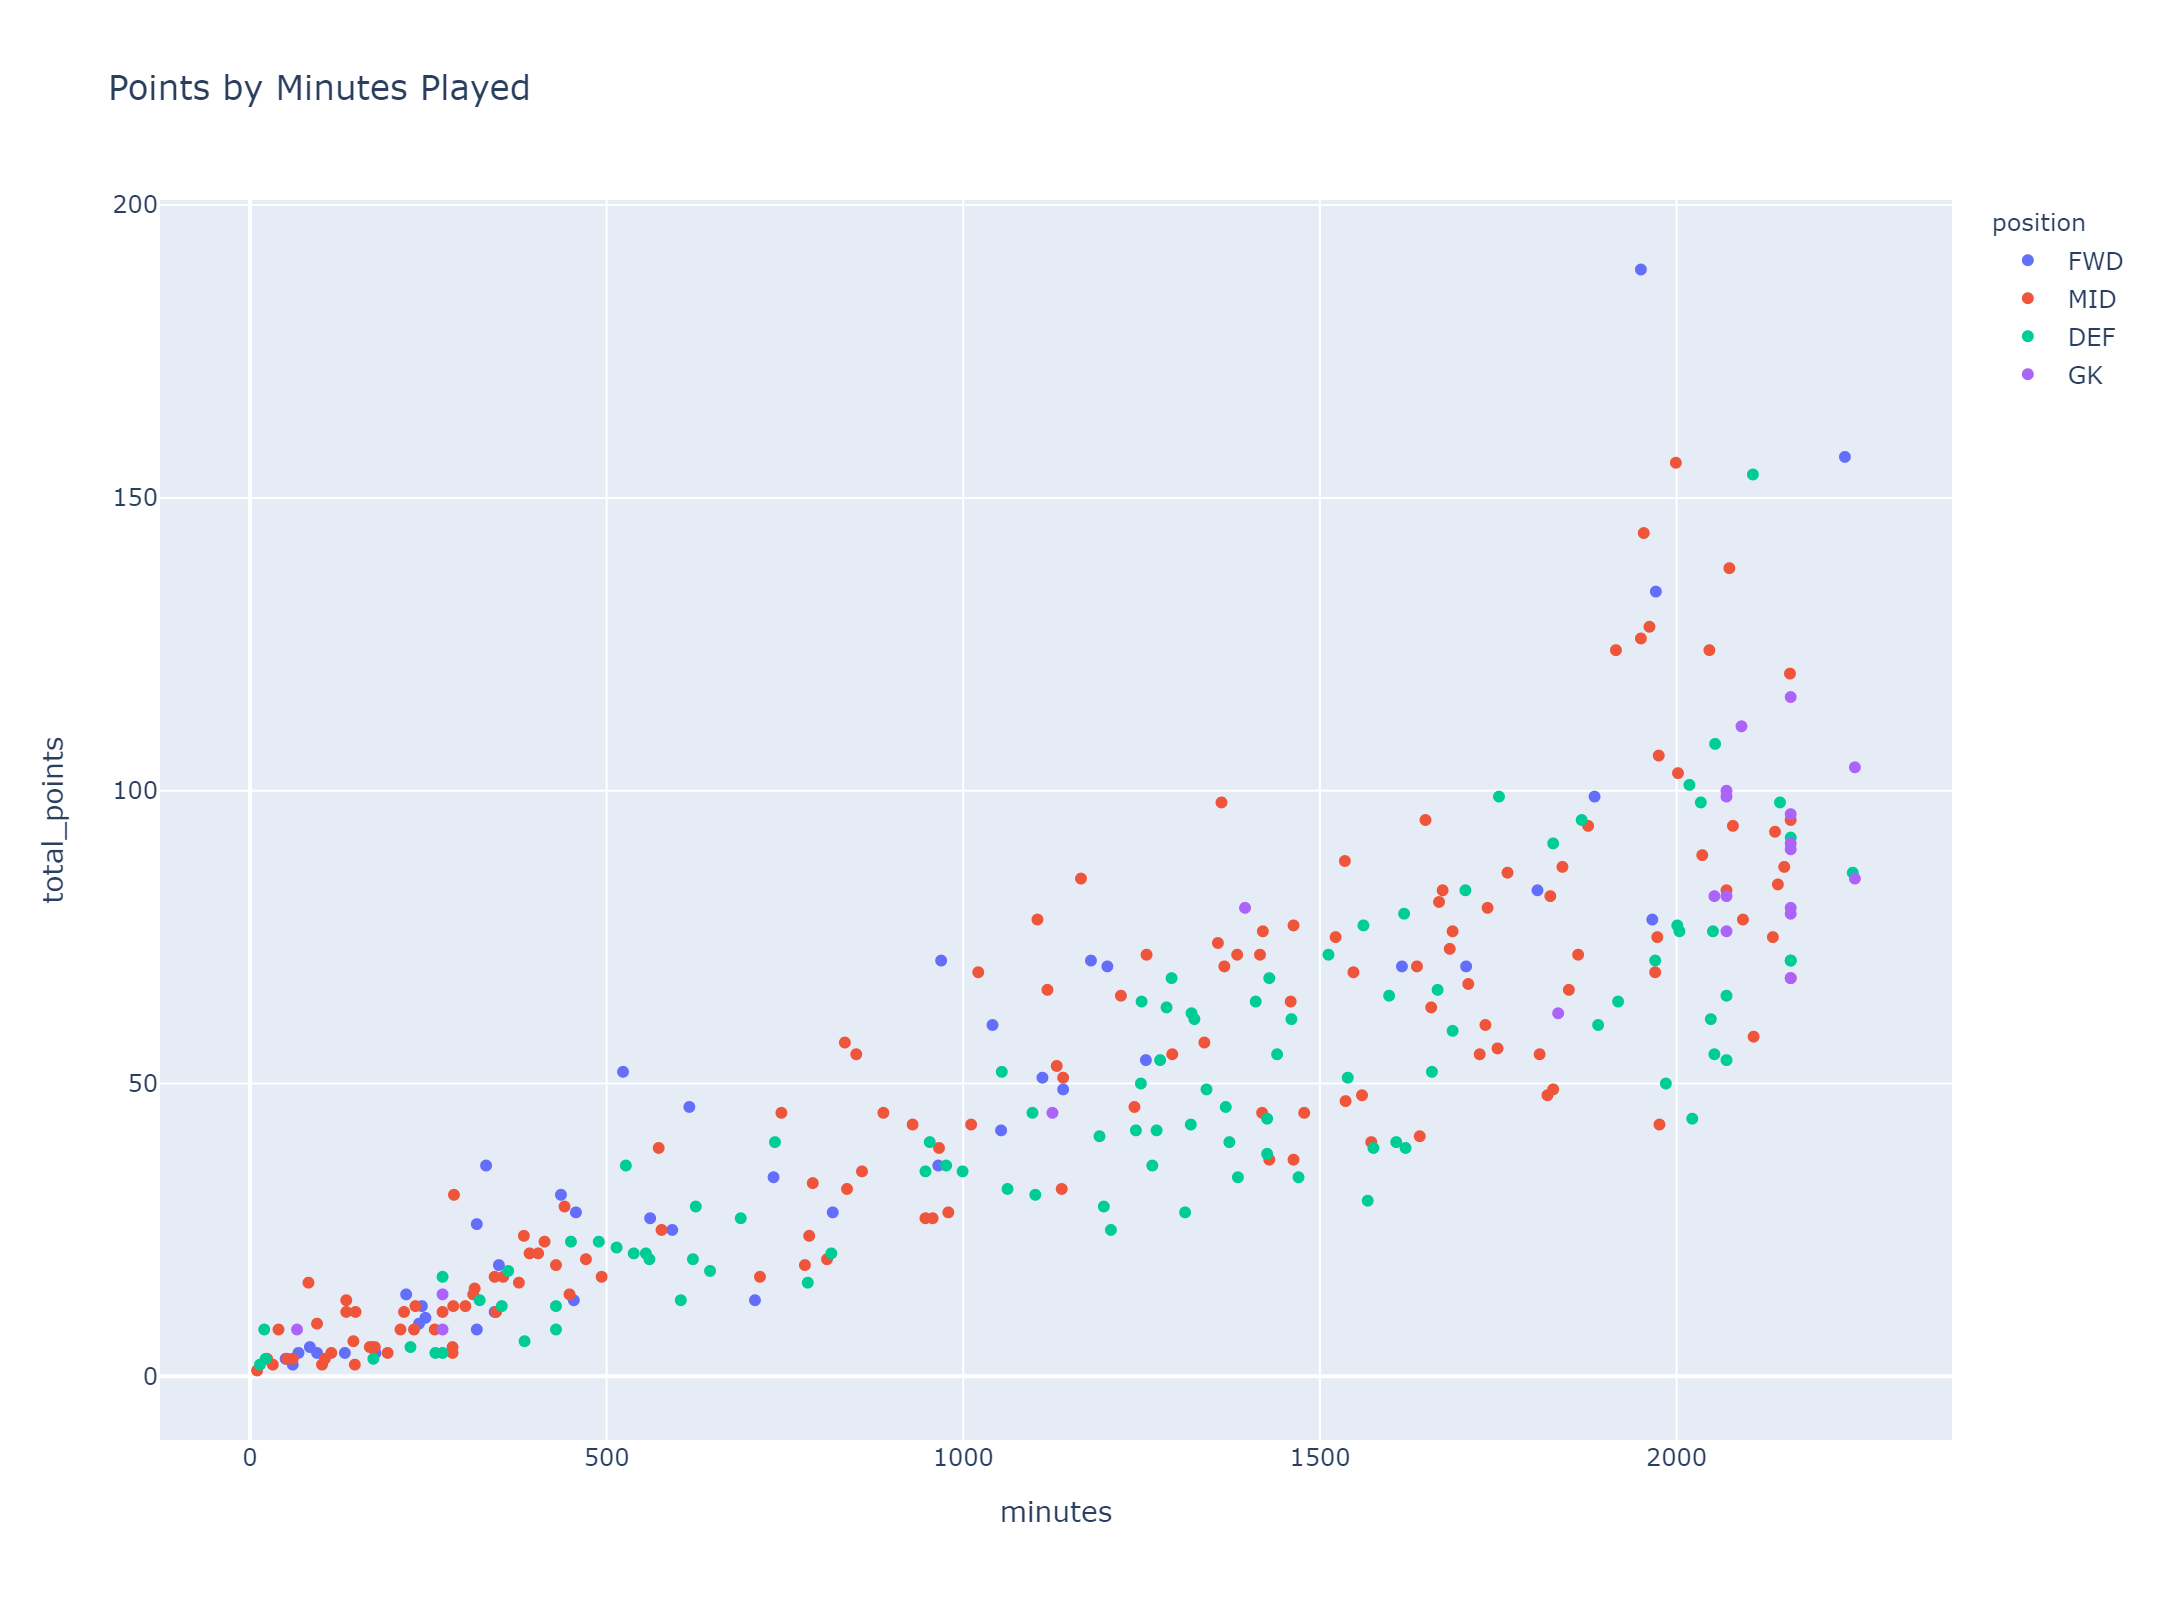

In [13]:
# REMEBER TO UPDATE THIS
from IPython import display
display.Image("../../Images/Points-Minutes.png")

Unsuprisingly, the total points earned by a player has a direct positive correlation to the minutes played for all positions. This is because the more time you get to play on the pitch the more likely a player is to contribute to the game.

## Undervalued Players

We will get an aggregation of the points earned from GW 1-24 and then compare this to the current value (GW 24) of the player to determine if any opportunites of undervalued players exist.

An undervalued player is a player who has a low value and a high aggregation of total points.

In [14]:
px.scatter(agg, x= 'value', y= 'total_points', color= 'position', title = 'Players Points in Season to Current Value', hover_data=['name', 'team']).show()

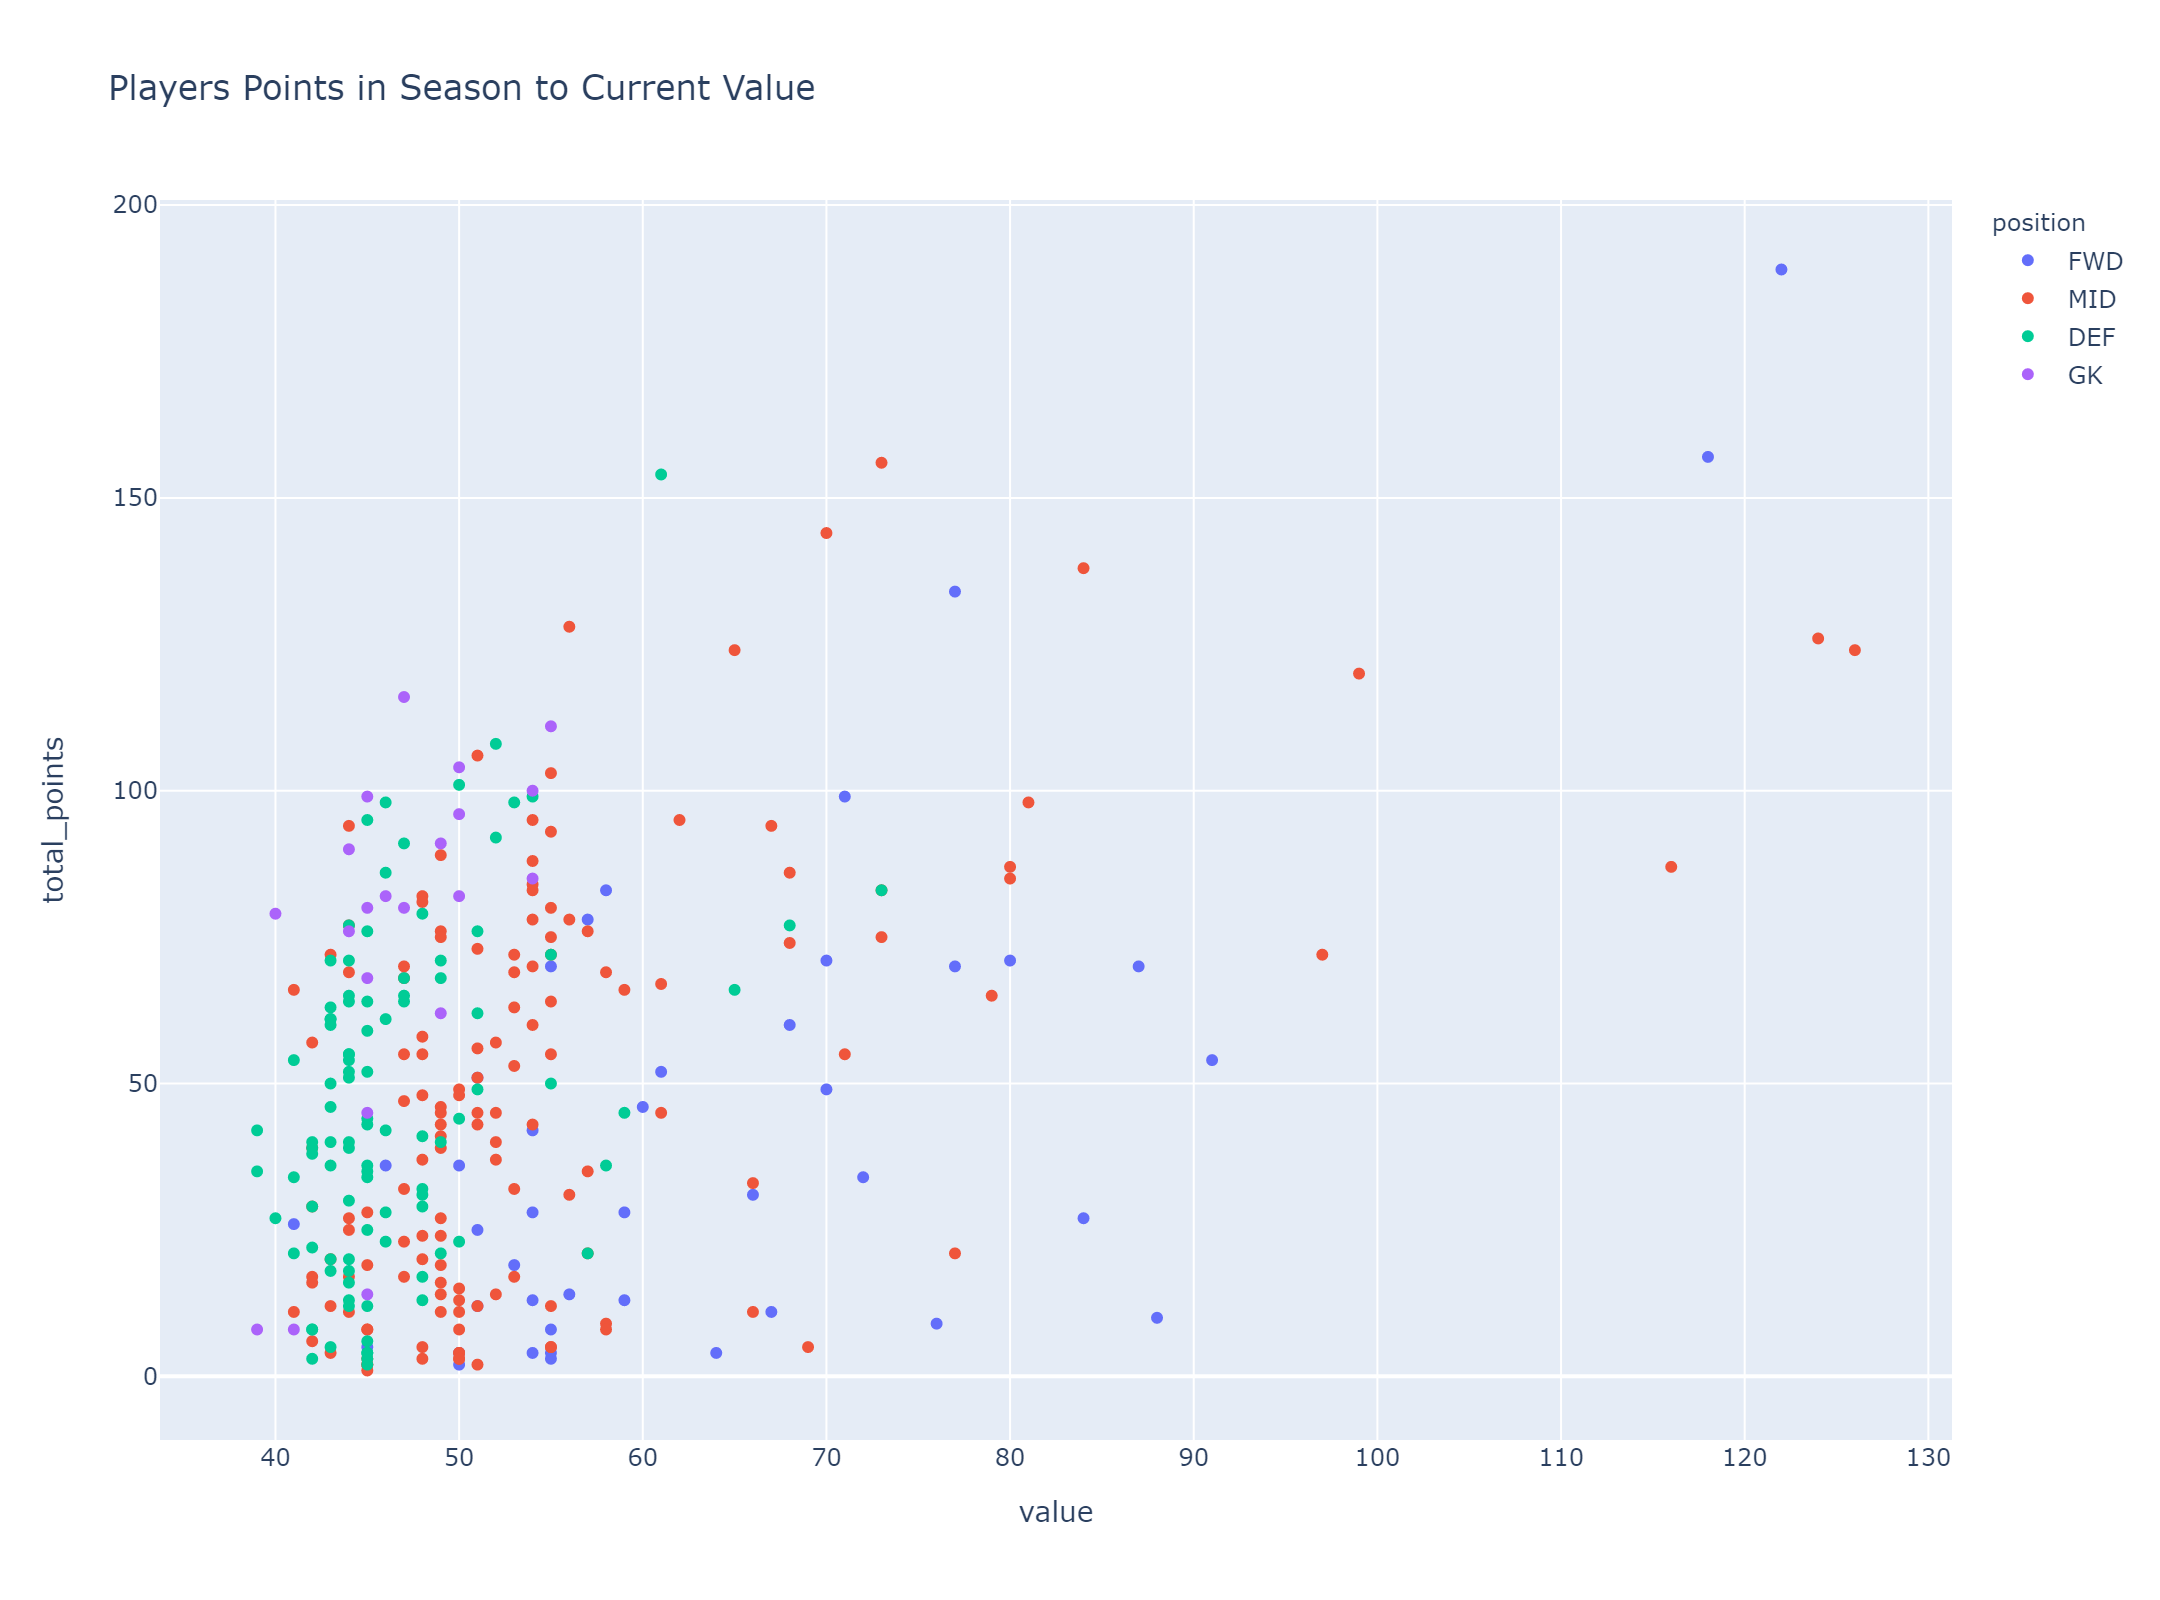

In [15]:
# REMEMBER TO UPDATE THIS AS WELL
display.Image("../../Images/agg_pv.png")

From the above plot we can determine that there are some undervalued players who have earned alot of points and have a lower cost compared to other players who have a higher cost but lower points earned. 

This can help us see that having big name players may not be the best way to win FPL since there are some undervalued players.

## Most Valuable Positions

We will determine the most valuable positions through the average points-value ratio by each position.

In [16]:
avg_ratio_pos = agg.groupby('position')[['PV-ratio']].mean().reset_index()
px.bar(avg_ratio_pos, 
       x= 'position', 
       y= 'PV-ratio', 
       title = 'Average Points-Value Ratio by Positions',
       color= 'position').show()

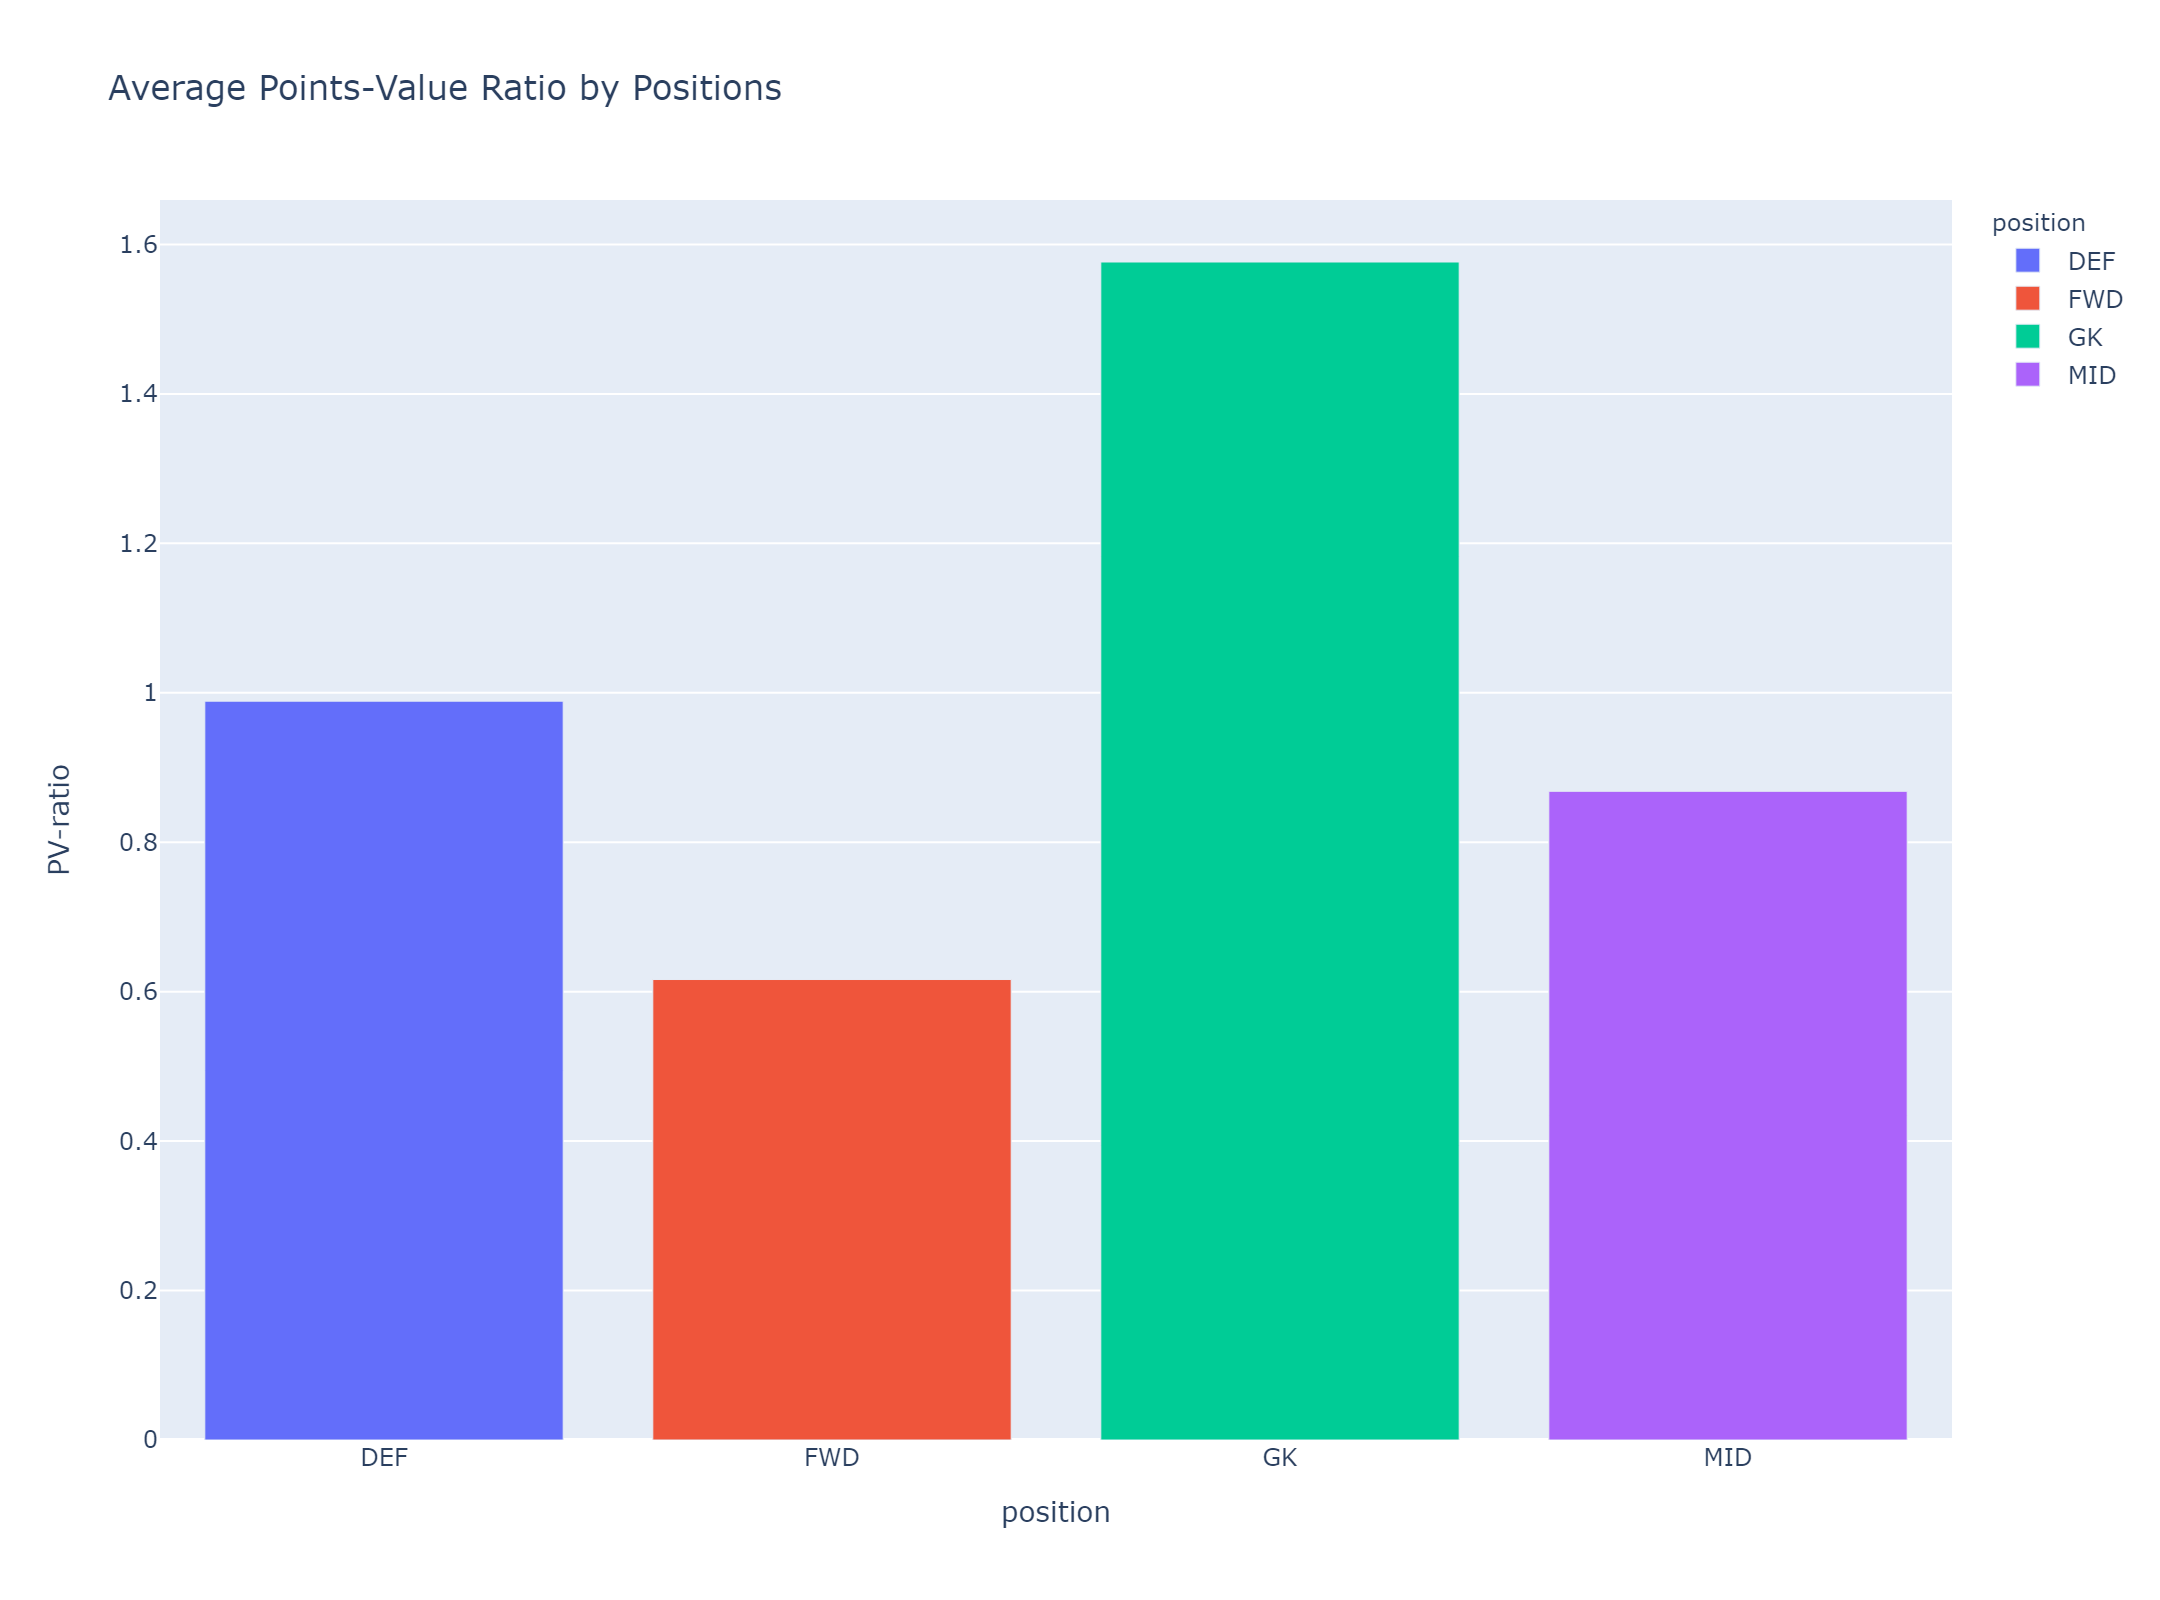

In [17]:
# REMEBER TO UPDATE THIS AS WELL
display.Image("../../Images/avg-pvr.png")

Notice that the average points-value ratio indicates that defensive players (goalkeepers, defenders) are the most valuable to invest in followed by midfielders and then attacking forwards. 

This may be because there are fewer goalkeepers than any other position and are rarely rotated therefore introducing some bias due to their consistency. Additionally, attacking defenders may be skewing the data since in FPL rules, defenders earn more points for their attacking and defensive contributions than any other position followed by midfielders than forwards.

### Attacking Contributions

In [18]:
attack = agg.groupby('position')[['goals_scored', 'assists']].sum().reset_index()

import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Goals', x=attack['position'], y=attack['goals_scored']),
    go.Bar(name='Assists', x=attack['position'], y=attack['assists'])
])

fig.update_layout(title_text ='Attacking Contributions by Position', xaxis = dict(title='Positions'), yaxis = dict(title='Number of Goals/Assists') ,barmode='group')
fig.show()

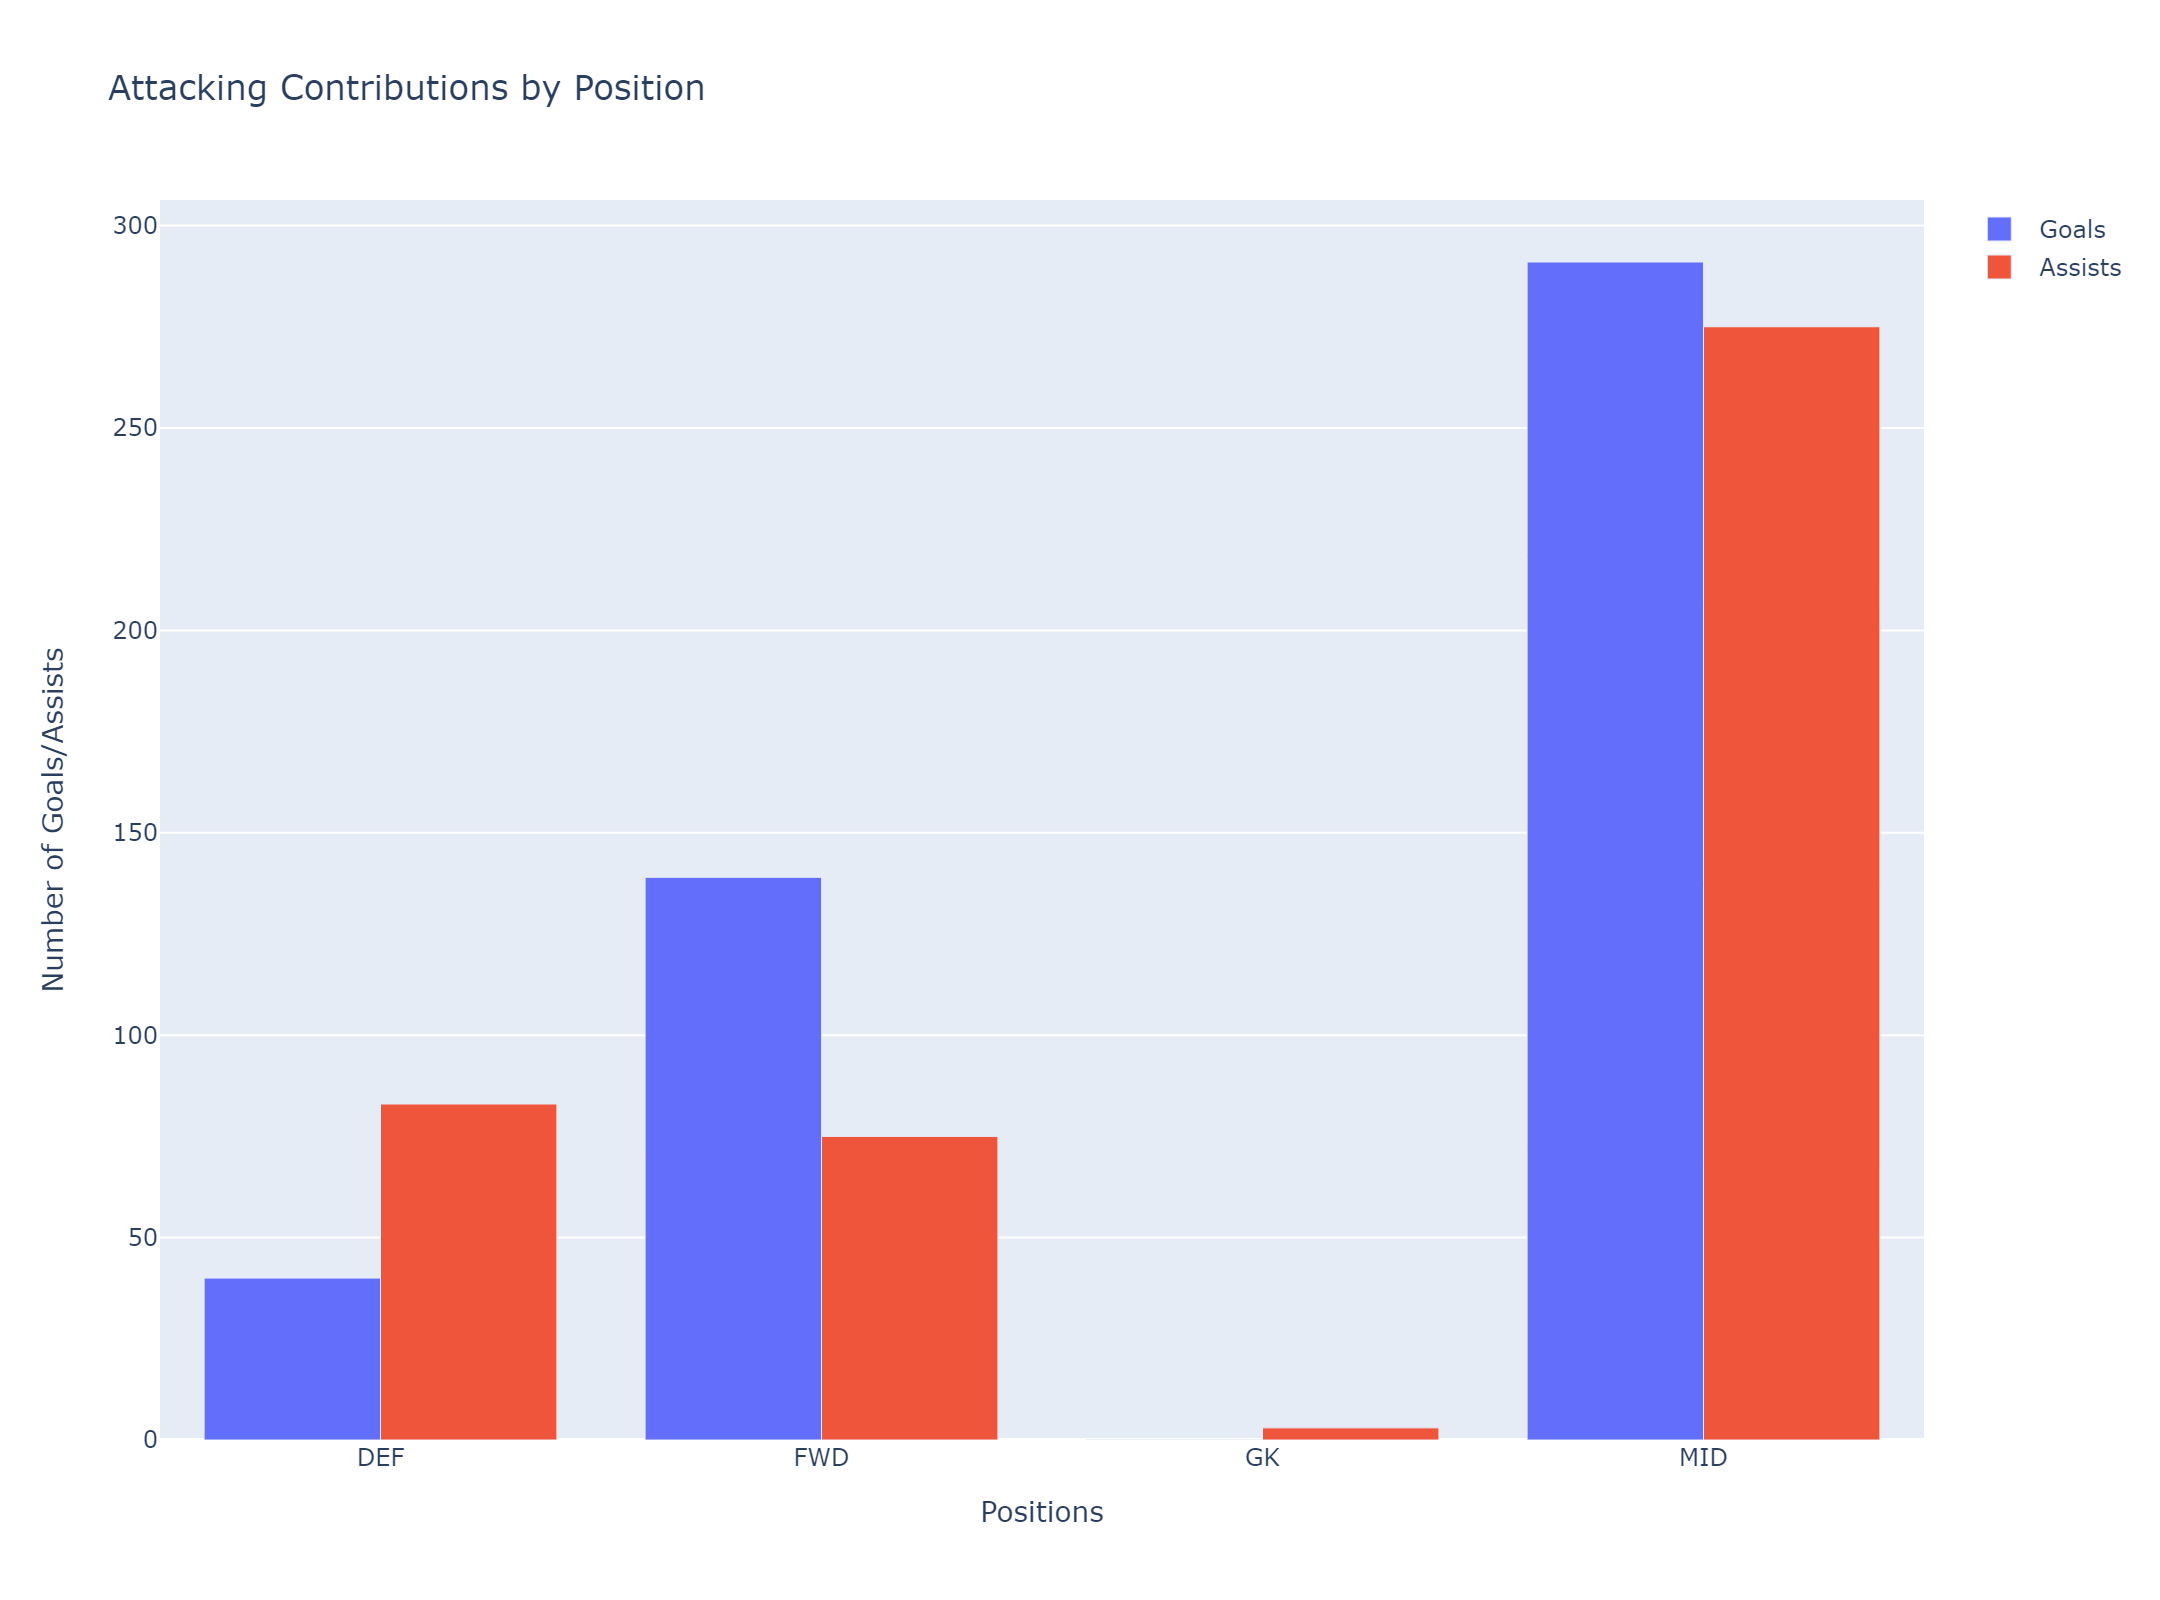

In [19]:
# Remember to update
display.Image("../../Images/attack.png")

From the above graph we can see that midfielders have the most attacking contributions which provides evidence that they are the most valuable picks for an FPL team especially when considering the possible skew introduced for defenders and goalkeepers in the PV ratios.

### Defensive Contributions

In [20]:
defend = agg.groupby('position')[['clean_sheets', 'saves']].sum().reset_index()

fig = go.Figure(data=[
    go.Bar(name='Clean Sheets', x=defend['position'], y=defend['clean_sheets']),
    go.Bar(name='Saves', x=defend['position'], y=defend['saves'])
])

fig.update_layout(title_text ='Defensive Contributions by Position', xaxis = dict(title='Positions'), yaxis = dict(title='Number of CS/Saves'), barmode='group')
fig.show()

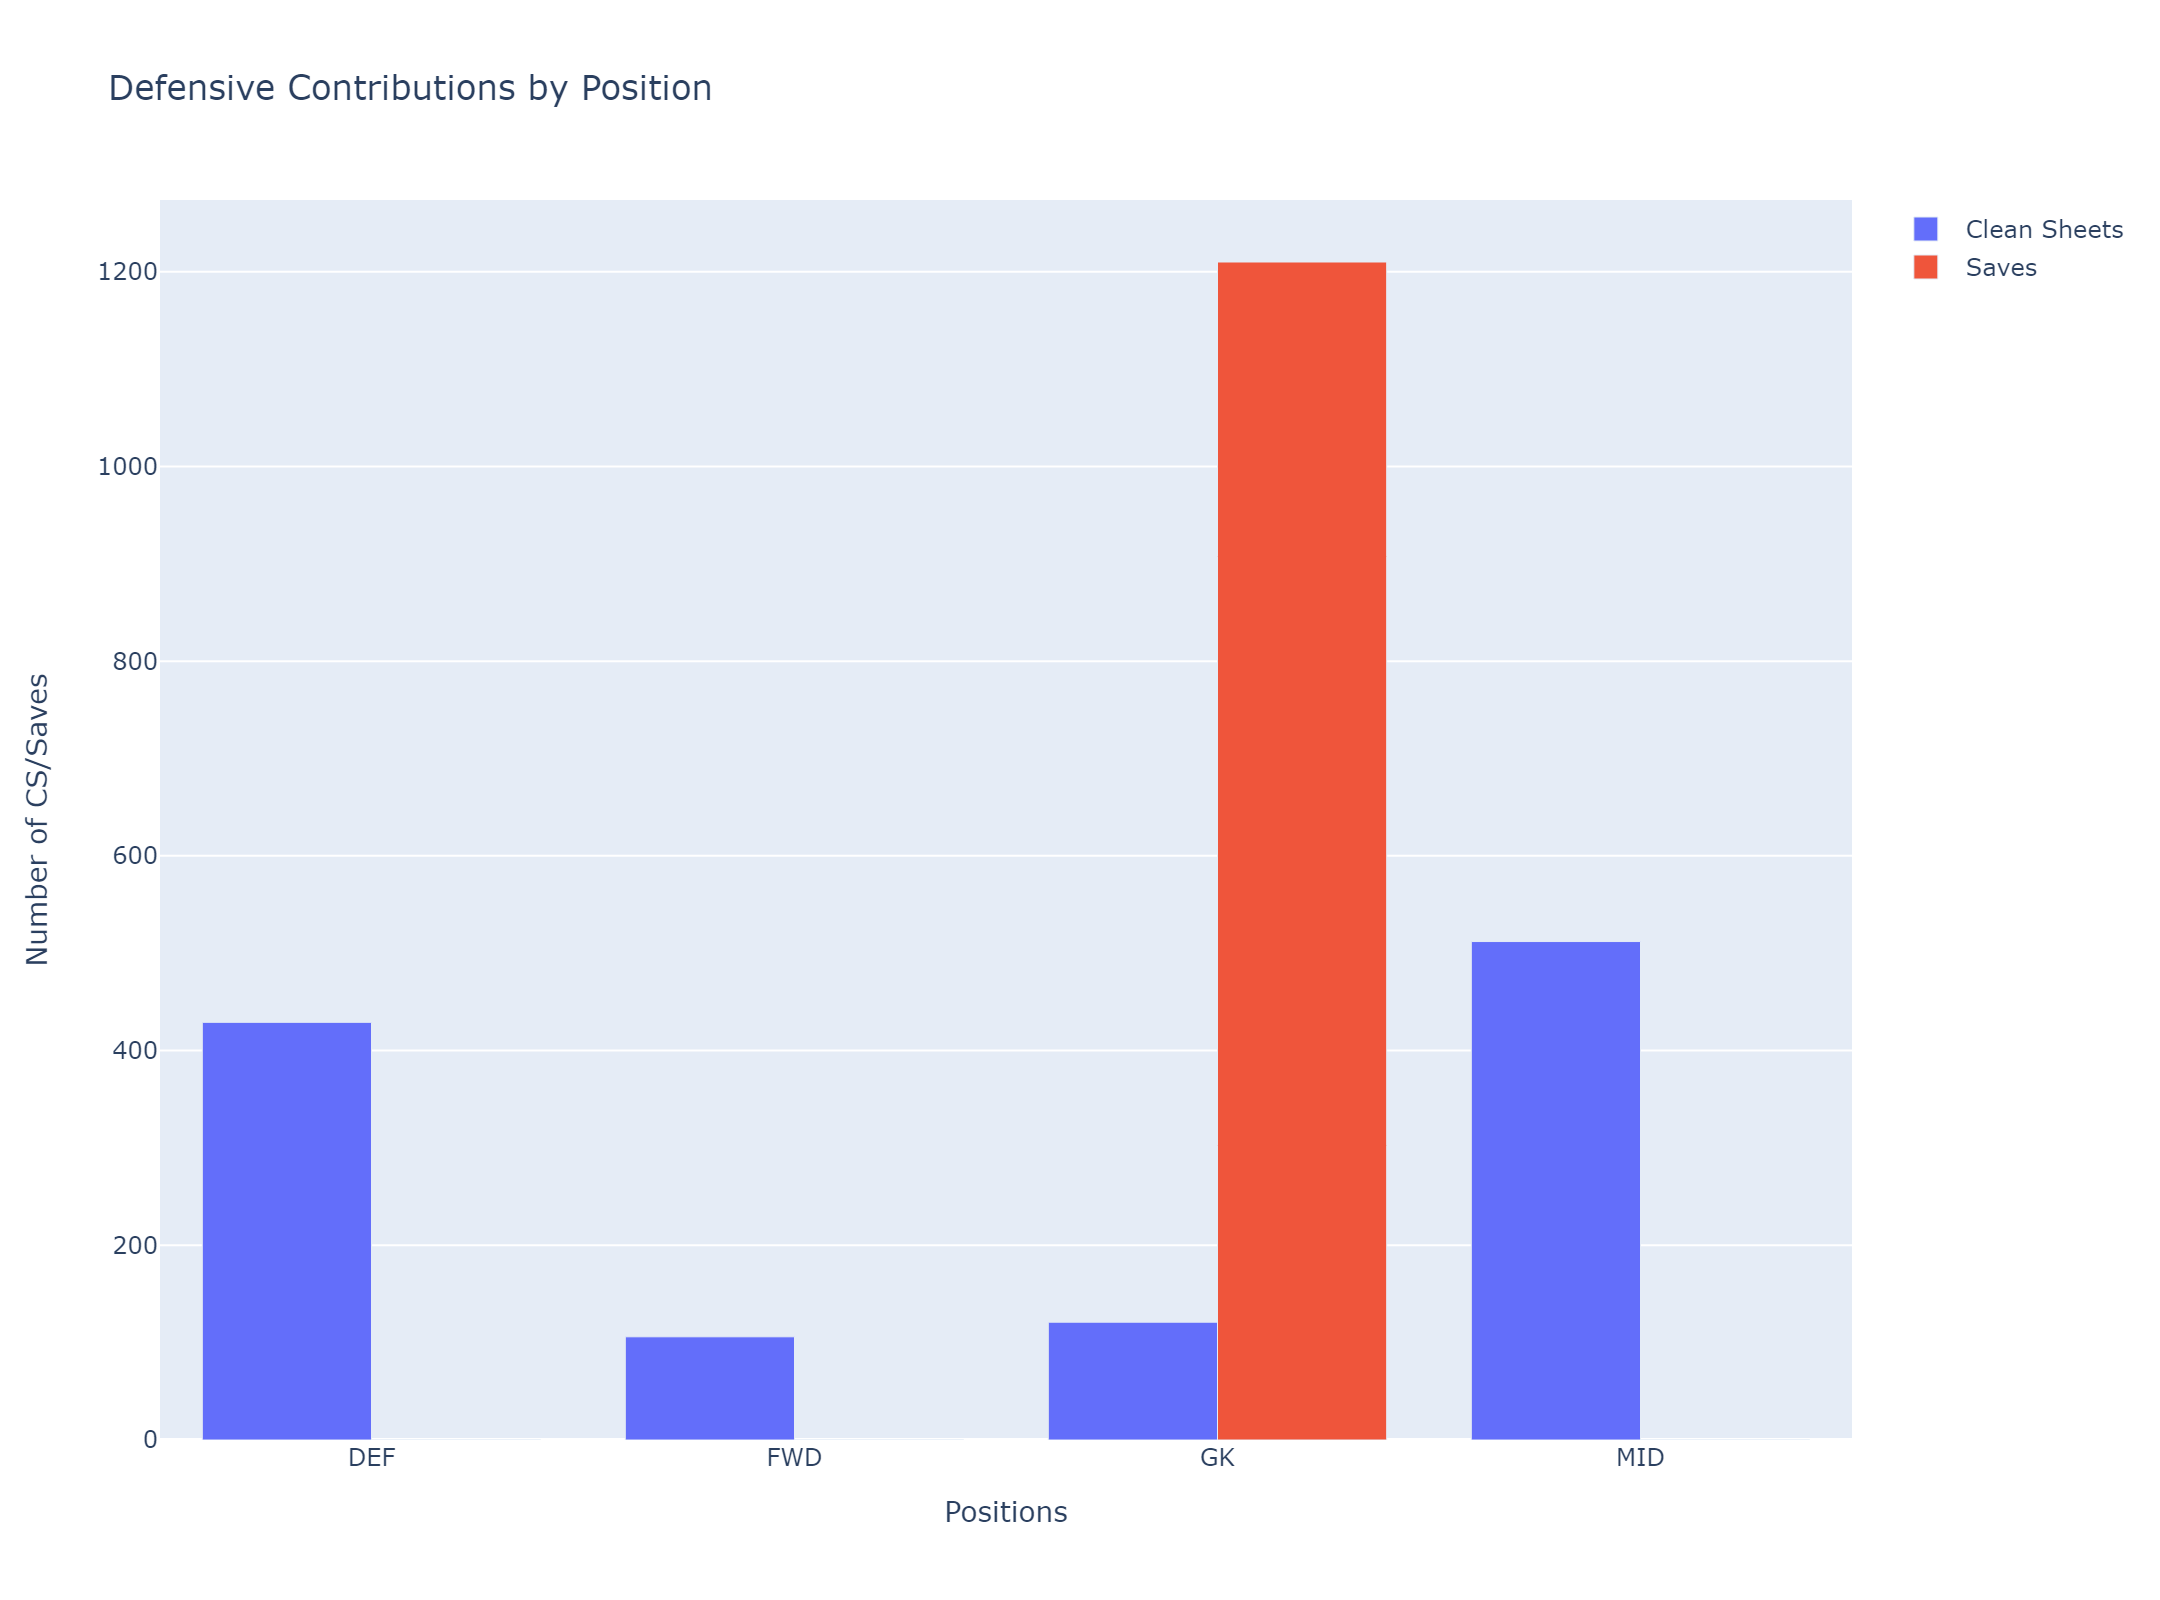

In [21]:
# remeber to update
display.Image("../../Images/defend.png")

From the above we see that the most defensive contributions come from goalkeepers and defenders who each are awarded the highest amount of points for their defensive efforts making them more valuable defensively.

### Negative Contributions

In [22]:
bad = agg.groupby('position')[['own_goals', 'goals_conceded','penalties_missed', 'yellow_cards', 'red_cards']].sum().reset_index()

fig = go.Figure(data=[
    go.Bar(name='Own Goals', x=bad['position'], y=bad['own_goals']),
    go.Bar(name='Goals Conceded', x=bad['position'], y=bad['goals_conceded']),
    go.Bar(name='Missed Penalties', x=bad['position'], y=bad['penalties_missed']),
    go.Bar(name='Yellow Cards', x=bad['position'], y=bad['yellow_cards']),
    go.Bar(name='Red Cards', x=bad['position'], y=bad['red_cards']),
])

fig.update_layout(title_text ='Negative Contributions by Position', xaxis = dict(title='Positions'), yaxis = dict(title='Number of Negative Contributions'), barmode='group')
fig.show()

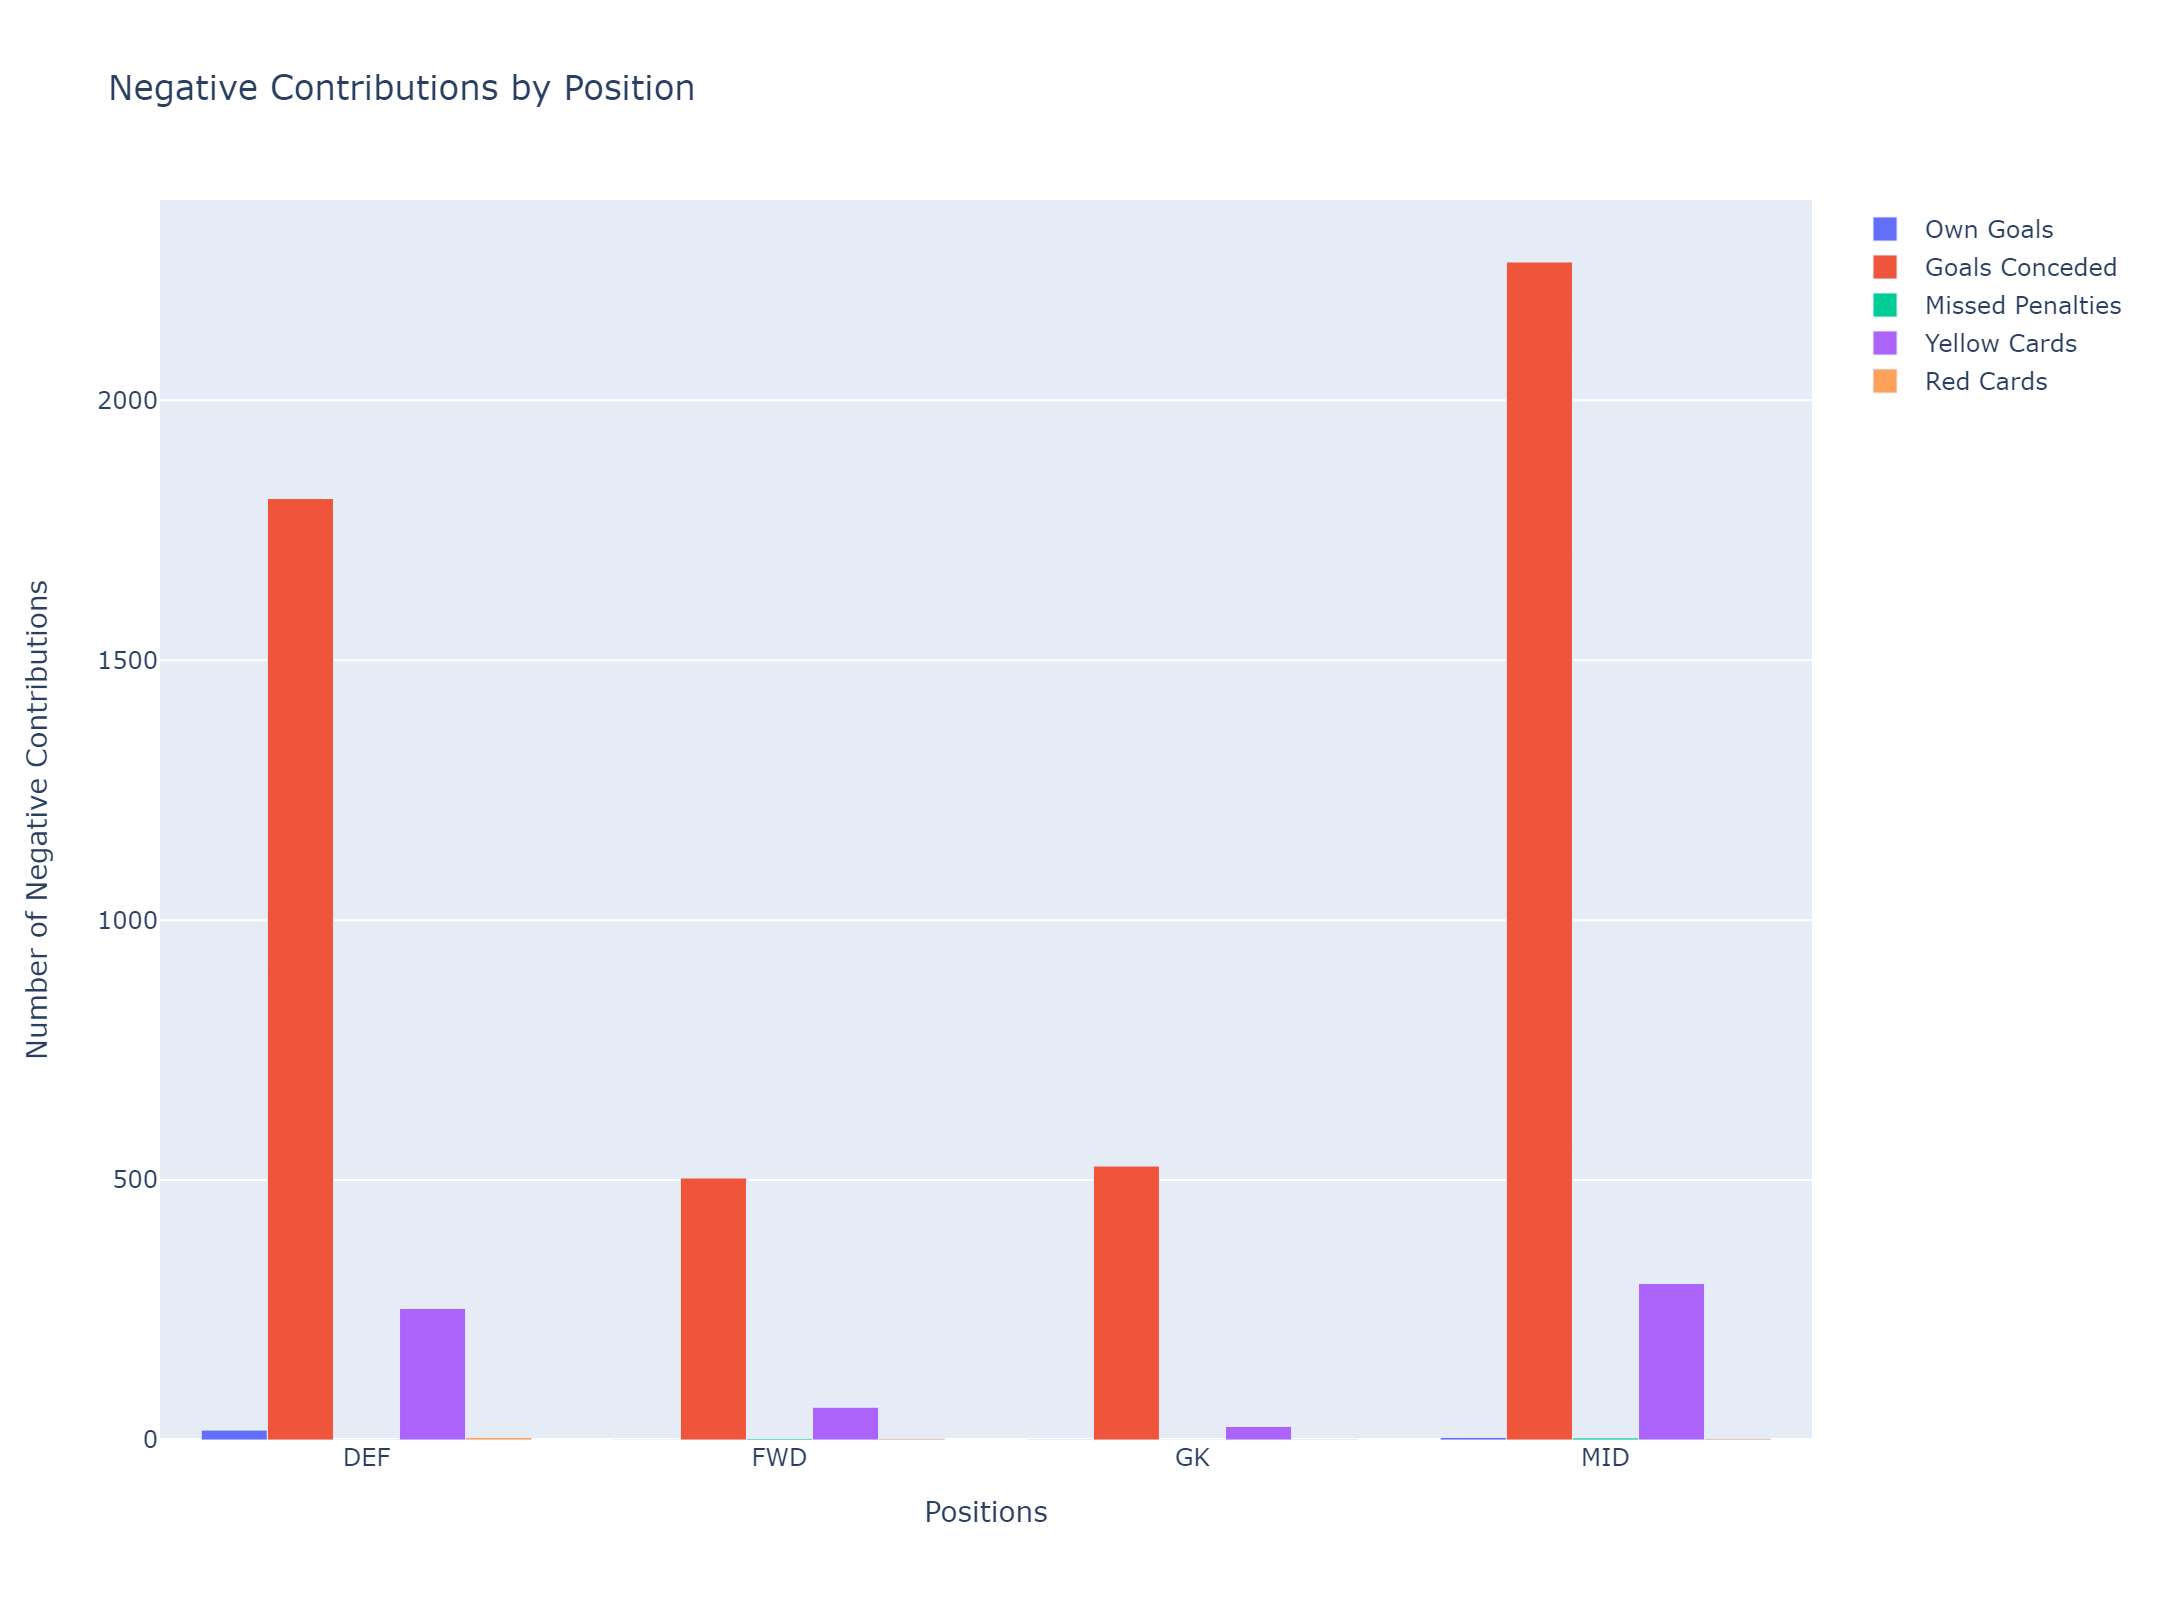

In [23]:
# remember to update
display.Image("../../Images/bad.png")

From the above, we can see that defenders and midfielders have the highest negative contributions in goals conceded and yellow cards received. 

We can conclude that due to the magnitude of these actions and the opposing positive contributions from attacking and defensive efforts in the previous graphs that the most valuable positions may be in the following order:

1. Midfielders
2. Forwards
3. Defenders
4. Goalkeepers

# Feature Selection and Engineering for Modelling

In this section, we will be selecting features that are indicative of a player's form to help us predict the fantasy points they can earn. To do this, we will use the previous gameweeks to predict total points in the current gameweek.

We will be creating a lagged features for each player's performance as well as the ICT features. For example if the goals scored in gameweek 1 was 1 goal, we will use this as our input for gameweek 2.

From now, we will be taking a subset of the original dataset to include individual player statistics and columns for team selection which will include:

`name`, `position`, `team`, `xP`, `GW`, `minutes`, `goals_scored`, `assists`, `clean_sheets`, `saves`, `penalties_missed`, `penalties_saved`, `yellow_cards`, `red_cards`, `goals_conceded`, `own_goals`, `expected_goals`, `expected_assists`, `expected_goal_involvements`, `expected_goals_conceded`, `influence`, `creativity`, `threat`, `value`, `total_points`

In the modelling section, we will use the following features:

`minutes`, `goals_scored`, `assists`, `clean_sheets`, `saves`, `penalties_missed`, `penalties_saved`, `yellow_cards`, `red_cards`, `goals_conceded`, `own_goals`, `expected_goals`, `expected_assists`, `expected_goal_involvements`, `expected_goals_conceded`, `influence`, `creativity`, `threat`, `value`

The target column will be `total_points`.

In [24]:
model_df = df[['name', 'position', 'team', 'xP', 'GW', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'saves', 'penalties_missed', 'penalties_saved', 'yellow_cards', 'red_cards', 'goals_conceded', 'own_goals', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'expected_goals_conceded', 'influence', 'creativity', 'threat', 'value', 'total_points']]
model_df.head()

name position         team   xP  GW  minutes  goals_scored  \
0    Nathan Redmond      MID  Southampton  1.5   1        1             0   
1  Junior Stanislas      MID  Bournemouth  1.1   1        1             0   
2     Armando Broja      FWD      Chelsea  2.0   1       15             0   
3      Fabian Schär      DEF    Newcastle  2.4   1       90             1   
4       Jonny Evans      DEF    Leicester  1.9   1       90             0   

   assists  clean_sheets  saves  penalties_missed  penalties_saved  \
0        0             0      0                 0                0   
1        0             0      0                 0                0   
2        0             0      0                 0                0   
3        0             1      0                 0                0   
4        0             0      0                 0                0   

   yellow_cards  red_cards  goals_conceded  own_goals  expected_goals  \
0             0          0               0          0             0.0   
1             0          0               0          0             0.0   
2             0          0               0          0             0.0   
3             0          0               0          0             0.0   
4             0          0               2          0             0.0   

   expected_assists  expected_goal_involvements  expected_goals_conceded  \
0               0.0                         0.0                      0.0   
1               0.0                         0.0                      0.0   
2               0.0                         0.0                      0.0   
3               0.0                         0.0                      0.0   
4               0.0                         0.0                      0.0   

   influence  creativity  threat  value  total_points  
0        0.0         0.0     0.0     55             1  
1        0.0         0.0     0.0     50             1  
2        5.2         0.3    19.0     55             1  
3       66.0        14.6    25.0     45            15  
4       14.0         1.3     0.0     45             1

We will now be shifting the results from the previous gameweeks to the following gameweek (a shift of 1) to create lagged features so that previous gameweek results are used to predict the current results. In simpler terms results of gameweek 1 will be used to predict results of gameweek 2. After creating the lagged columns we will remove all of GW 1 since they will be NaN numbers or incorrectly inserted as a previous player. Additionally, we will remove all of the columns of the true results to clean-up our data prior to modelling.

In [25]:
model_df = model_df.sort_values(['name', 'GW']).reset_index(drop=True)

In [26]:
# creating lagged features
for col in model_df.columns[5:-1]:
    lagged_feature = 'last_' + col
    model_df[lagged_feature] = model_df[col].shift(1)

In [27]:
model_df.head(34)

name position       team   xP  GW  minutes  goals_scored  \
0   Aaron Cresswell      DEF   West Ham  1.3   1       90             0   
1   Aaron Cresswell      DEF   West Ham  2.0   2       90             0   
2   Aaron Cresswell      DEF   West Ham  1.0   3       90             0   
3   Aaron Cresswell      DEF   West Ham  2.2   4       90             0   
4   Aaron Cresswell      DEF   West Ham  1.7   5       71             0   
5   Aaron Cresswell      DEF   West Ham  1.1   6        0             0   
6   Aaron Cresswell      DEF   West Ham  2.5   8       90             0   
7   Aaron Cresswell      DEF   West Ham  3.5   9       90             0   
8   Aaron Cresswell      DEF   West Ham  3.0  10       90             0   
9   Aaron Cresswell      DEF   West Ham  3.0  11       90             0   
10  Aaron Cresswell      DEF   West Ham  0.0  12       90             0   
11  Aaron Cresswell      DEF   West Ham  4.5  13       90             0   
12  Aaron Cresswell      DEF   West Ham  3.7  14       90             0   
13  Aaron Cresswell      DEF   West Ham  3.2  15       90             0   
14  Aaron Cresswell      DEF   West Ham  3.0  16       90             0   
15  Aaron Cresswell      DEF   West Ham  0.2  17       90             0   
16  Aaron Cresswell      DEF   West Ham  1.0  18       90             0   
17  Aaron Cresswell      DEF   West Ham  1.0  18       90             0   
18  Aaron Cresswell      DEF   West Ham  1.0  19       22             0   
19  Aaron Cresswell      DEF   West Ham  1.2  20       90             0   
20  Aaron Cresswell      DEF   West Ham  1.0  21        0             0   
21  Aaron Cresswell      DEF   West Ham  0.7  22        0             0   
22  Aaron Cresswell      DEF   West Ham  0.0  23        0             0   
23  Aaron Cresswell      DEF   West Ham  0.0  24        0             0   
24  Aaron Cresswell      DEF   West Ham  0.2  25       45             0   
25  Aaron Cresswell      DEF   West Ham  0.2  26        0             0   
26  Aaron Cresswell      DEF   West Ham  0.2  27        0             0   
27  Aaron Cresswell      DEF   West Ham  0.6  29        2             0   
28  Aaron Cresswell      DEF   West Ham  0.6  29        0             0   
29  Aaron Cresswell      DEF   West Ham  3.0  30       90             0   
30  Aaron Cresswell      DEF   West Ham  1.7  31       90             0   
31  Aaron Cresswell      DEF   West Ham  4.7  32       90             0   
32  Aaron Cresswell      DEF   West Ham  3.2  33       90             0   
33     Aaron Hickey      DEF  Brentford  2.3   1       83             0   

    assists  clean_sheets  saves  penalties_missed  penalties_saved  \
0         0             0      0                 0                0   
1         0             0      0                 0                0   
2         0             0      0                 0                0   
3         0             1      0                 0                0   
4         0             0      0                 0                0   
5         0             0      0                 0                0   
6         0             0      0                 0                0   
7         0             1      0                 0                0   
8         0             0      0                 0                0   
9         0             0      0                 0                0   
10        0             0      0                 0                0   
11        0             1      0                 0                0   
12        0             0      0                 0                0   
13        0             0      0                 0                0   
14        0             0      0                 0                0   
15        0             0      0                 0                0   
16        0             0      0                 0                0   
17        0             0      0                 0                0   
18        0             0      0        

In [28]:
# Dropping all of Gameweek 1 and players who did not play any minutes
model_df = model_df.drop(model_df[model_df['GW']==1].index | model_df[model_df['minutes']==0].index , axis=0).reset_index(drop=True)

# Dropping all true results
model_df = model_df.drop(columns=model_df.columns[5:24])

model_df

C:\Users\Farhan Kassam\AppData\Local\Temp\ipykernel_6584\3558185022.py:2: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.



name position       team   xP  GW  total_points  \
0     Aaron Cresswell      DEF   West Ham  2.0   2             2   
1     Aaron Cresswell      DEF   West Ham  1.0   3             0   
2     Aaron Cresswell      DEF   West Ham  2.2   4             6   
3     Aaron Cresswell      DEF   West Ham  1.7   5             2   
4     Aaron Cresswell      DEF   West Ham  2.5   8             2   
...               ...      ...        ...  ...  ..           ...   
9654   Çaglar Söyüncü      DEF  Leicester -0.7  14             2   
9655   Çaglar Söyüncü      DEF  Leicester  0.0  22             0   
9656   Çaglar Söyüncü      DEF  Leicester -1.0  31             0   
9657   Çaglar Söyüncü      DEF  Leicester  0.4  32             2   
9658   Çaglar Söyüncü      DEF  Leicester  0.7  33             2   

      last_minutes  last_goals_scored  last_assists  last_clean_sheets  \
0             90.0                0.0           0.0                0.0   
1             90.0                0.0           0.0                0.0   
2             90.0                0.0           0.0                0.0   
3             90.0                0.0           0.0                1.0   
4              0.0                0.0           0.0                0.0   
...            ...                ...           ...                ...   
9654           0.0                0.0           0.0                0.0   
9655           0.0                0.0           0.0                0.0   
9656           0.0                0.0           0.0                0.0   
9657          90.0                0.0           0.0                0.0   
9658          90.0                0.0           0.0                0.0   

      last_saves  last_penalties_missed  last_penalties_saved  \
0            0.0                    0.0                   0.0   
1            0.0                    0.0                   0.0   
2            0.0                    0.0                   0.0   
3            0.0                    0.0                   0.0   
4            0.0                    0.0                   0.0   
...          ...                    ...                   ...   
9654         0.0                    0.0                   0.0   
9655         0.0                    0.0                   0.0   
9656         0.0                    0.0                   0.0   
9657         0.0                    0.0                   0.0   
9658         0.0                    0.0                   0.0   

      last_yellow_cards  last_red_cards  last_goals_conceded  last_own_goals  \
0                   0.0             0.0                  2.0             0.0   
1                   0.0             0.0                  1.0             0.0   
2                   1.0             0.0                  2.0             0.0   
3                   0.0             0.0                  0.0             0.0   
4                   0.0             0.0                  0.0             0.0   
...                 ...             ...                  ...             ...   
9654                0.0             0.0                  0.0             0.0   
9655                0.0             0.0                  0.0             0.0   
9656                0.0             0.0                  0.0             0.0   
9657                1.0             0.0                  3.0             0.0   
9658                0.0             0.0                  1.0             0.0   

      last_expected_goals  last_expected_assists  \
0                    0.00                   0.00   
1                    0.00                   0.00   
2                    0.00                   0.00   
3                    0.00                   0.00   
4                    0.00                   0.00   
...                   ...                    ...   
9654                 0.00                   0.00   
9655                 0.00                   0.00   
9656                 0.00                   0.00   
9657                 0.09                   0.01 

After removing the players who did not play in a gameweek and removing the first GW which had null values for the previous match since no previous matches were played, we end with a dataset with 25 columns and 9659 rows.

Let's save this dataframe to be used in the modelling notebook.

In [29]:
model_df.to_csv('../data/cleaned.csv')

# Feature Correlation to Targets

We want to discover how the columns are correlated to our target column `total_points`.

Therefore, we will create a correlation heatmap and discuss the outcomes.

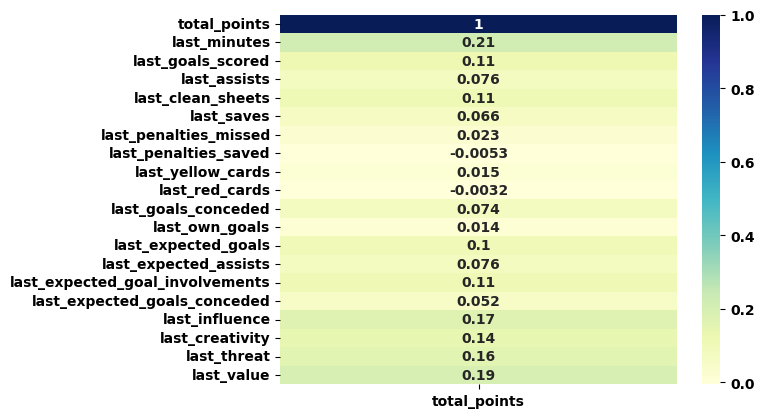

In [30]:
corr = model_df.iloc[:,5:].corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(corr[['total_points']], cmap="YlGnBu", annot=True)
plt.show()

From the correlation heatmap above, we can see a weak positive correlation between `total_points` and the features `last_minutes`, `last_influence`, `last_creativity`, `last_threat`, `last_value` with values of 0.21, 0.17, 0.14, 0.16, and 0.19 respectively. 

An important note is that `last_expected_goal_involvements`, `last_goals_scored`, `last_expected_goals` and `last_clean_sheets` also have a weak positive correlation with values of 0.11, 0.11, 0.1, and 0.11. This confirms what was discovered before that the FPL scoring system is heavily influenced by attacking contributions and can be valuable predictors of future points.